# **Lead Scoring Case Study**

#### Case study done by: <br> <font color=green> Kaustav Bhattacharjee

**Problem Statement:** To help the brand select the most promising leads, i.e. the leads that are most likely to convert into paying customers, based on the provided dataset. The Requirement is to build a model wherein a lead score needs to assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The target lead conversion rate has to be around 80%.

## 1. Importing various libraries

In [1]:
#Importing required libraries

import os
import time
import pandas as pd
import numpy as np
pd.set_option("max_columns", None) 
pd.set_option("max_rows", 20) 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to create count plot for categorical variables with 'Converted' as hue

def plotuninewapp(dataset,columnName):
    plt.figure(figsize=(12,5))
    plt.style.use('ggplot')
    sns.despine
    
    sns.countplot(x=columnName, data=dataset,hue='Converted')
    plt.ylabel('Total Counts')
    plt.title(f'Distribution of {columnName} for Converted and Non-Converted Leads',fontsize=15)
    plt.xticks(rotation='vertical')
    
    plt.show()

## 2. Importing the dataset and EDA

In [3]:
leads = pd.read_csv('Leads.csv')
leads_copy = leads.copy()
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the dataframe

leads.shape

(9240, 37)

In [5]:
#Checking the basic information about the featurs of the data frame

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# Checking the statistical description of the neumeric featurs

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

colstodrop = ['Prospect ID', 'Lead Number']

In [8]:
#dropping user generated columns

colstodrop.extend(['Last Activity','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [9]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [10]:
# Dropping columns where NaN is greater than 45%

colstodrop.extend(leads.columns[leads.isnull().mean()>0.45])
leads = leads.drop(colstodrop,axis=1)

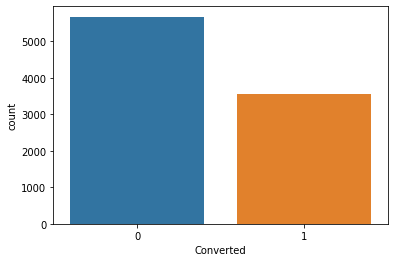

0    61.461039
1    38.538961
Name: Converted, dtype: float64


In [11]:
# Checking overall conversion rate
sns.countplot(leads['Converted'])
plt.show()
print(leads['Converted'].value_counts(normalize=True)*100)

## 2.1 Analyzing the categorical columns

In [12]:
# Checking for categories in other columns. We are going to drop columns with only one category.

for i in leads.select_dtypes(include=['category','object']).columns.to_list():
    print(round(leads[i].value_counts(normalize=True) *100, 2))
    print('---------------------------------------')

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
---------------------------------------
Google              31.16
Direct Traffic      27.63
Olark Chat          19.07
Organic Search      12.54
Reference            5.80
                    ...  
blog                 0.01
WeLearn              0.01
welearnblog_Home     0.01
NC_EDM               0.01
testone              0.01
Name: Lead Source, Length: 21, dtype: float64
---------------------------------------
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64
---------------------------------------
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
---------------------------------------
India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
                        ...  
Sri Lank

> From the detailed description above, for each categorical columns, we can determine the columns we need to drop based on their skewness.

In [13]:
#dropping columns with only one dominant category and checking the top 5 columns

leads = leads.drop(['Search', 'Magazine', 'Newspaper Article',
                      'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Country', 
                      'What matters most to you in choosing a course', 
                      'Through Recommendations', 'Receive More Updates About Our Courses',
                      "Update me on Supply Chain Content",
                      'Get updates on DM Content',
                      'I agree to pay the amount through cheque','Do Not Call'], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,NaN,Unemployed,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,NaN,Unemployed,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,NaN,Unemployed,Mumbai,No,Modified


In [14]:
# getting the list of categorical columns

categorical_cols = leads.select_dtypes(include=['category','object']).columns.to_list()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Specialization',
 'What is your current occupation',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### 2.2 Cleaning up the columns/Imputing Values/Dropping rows

#### Lead Origin

In [15]:
leads['Lead Origin'].value_counts(normalize=True,dropna=False)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [16]:
# Merging the last 3 into one category

leads['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Others',inplace=True)

#### Lead Source

In [17]:
leads['Lead Source'].value_counts(normalize=True,dropna=False)*100

Google              31.038961
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
                      ...    
WeLearn              0.010823
welearnblog_Home     0.010823
NC_EDM               0.010823
testone              0.010823
youtubechannel       0.010823
Name: Lead Source, Length: 22, dtype: float64

In [18]:
# Checking all the records with less than 5% of the values

ValCounts = leads['Lead Source'].value_counts()[leads['Lead Source'].value_counts(normalize=True)*100<5]

In [19]:
# Replacing small numbers with Others

leads['Lead Source'].replace(ValCounts.index.to_list(),'Others',inplace=True)
leads['Lead Source'].value_counts(normalize=True,dropna=False)*100

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             3.787879
NaN                0.389610
Name: Lead Source, dtype: float64

In [20]:
# Replacing NaN with Mode

leads['Lead Source'].replace(np.nan,'Google',inplace=True)

#### Specialization

In [21]:
leads['Specialization'].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

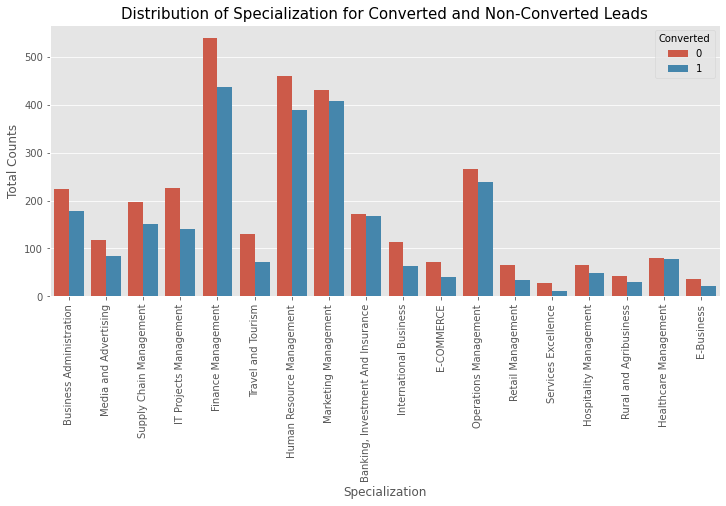

In [22]:
# Checking for trends

plotuninewapp(leads,'Specialization')

> We can see that 'Finance Management', 'HRM' and 'Marketing Management' has a very high contribution to the over all converted leads.

In [23]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                            'Healthcare Management','Hospitality Management',
                                                            'Retail Management'] ,'Management')

In [24]:
#Replacing the NaN with unspecified

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

#### current occupation

In [25]:
leads['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [26]:
#Replacing the NaN with mode of the column, that is Unemployed

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

#### City

In [27]:
leads['City'].value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [28]:
#Replacing the NaN with mode of the column, that is Mumbai
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

#### Last Notable Activity

In [29]:
leads['Last Notable Activity'].value_counts(normalize=True,dropna=False)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Email Received                   0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

In [30]:
# Checking all the records with less than 5% of the values

ValCounts = leads['Last Notable Activity'].value_counts()[leads['Last Notable Activity'].value_counts(normalize=True)*100<5]

# Replacing small numbers with Others

leads['Last Notable Activity'].replace(ValCounts.index.to_list(),'Others',inplace=True)
leads['Last Notable Activity'].value_counts(normalize=True,dropna=False)*100

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64

### Checking the correlation

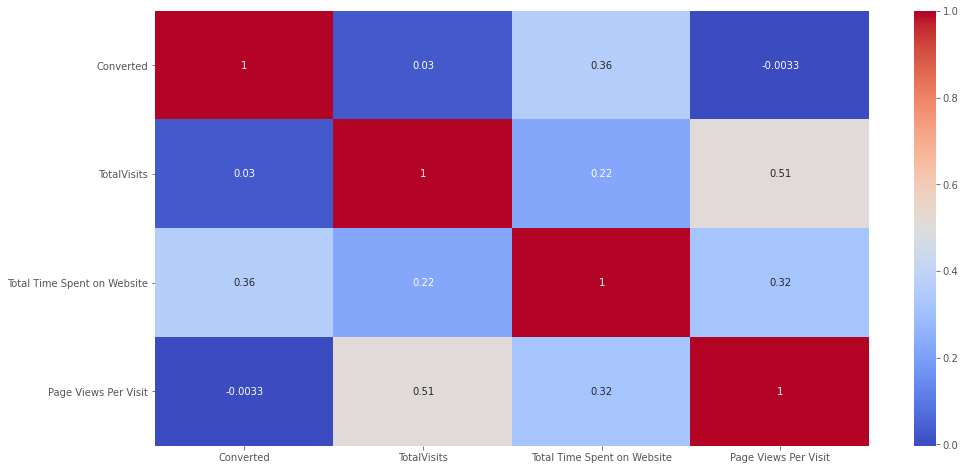

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(leads.corr(),cmap='coolwarm',annot=True)
plt.show()

> There is not much correlation between the continuous variables and we don't need to drop any columns

## 3. Analyzing the data and checking for any kind of trends 

In [32]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [33]:
len(leads.columns)

12

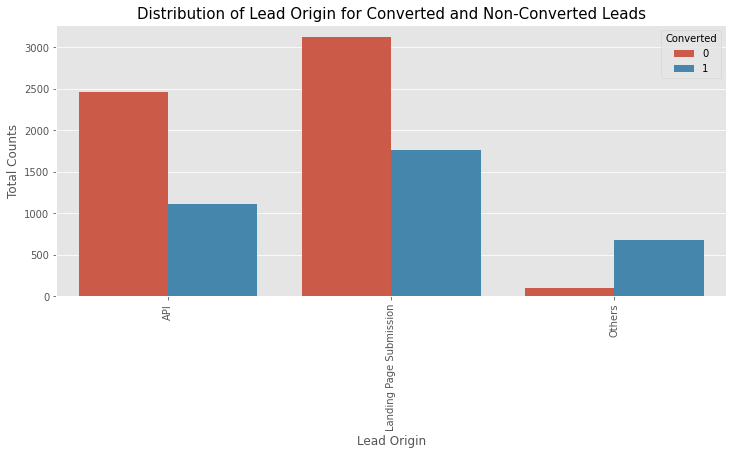

In [34]:
plotuninewapp(leads,'Lead Origin')

> There are more number of people acquired via Landing Page Submission. But both API and Landing page submission seems to have almost equal conversion rate

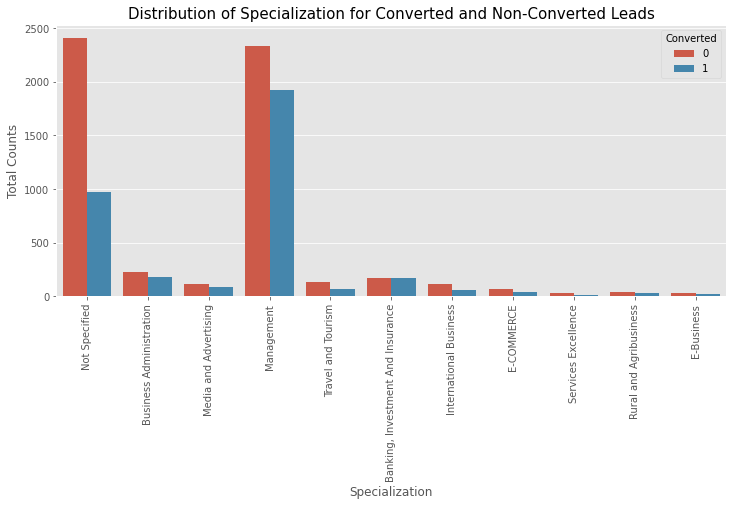

In [35]:
plotuninewapp(leads,'Specialization')

> We have good conversions rate with specializations 'Banking Investment And Insurance' and Management
> There is not much going on with the people who didn't specify there Specialization.

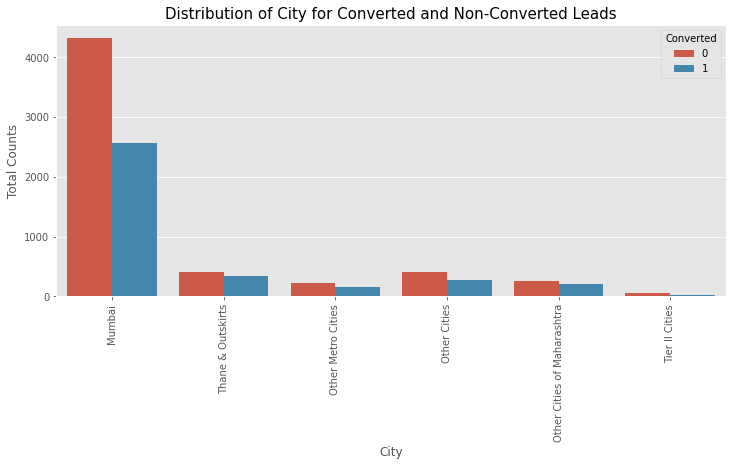

In [36]:
plotuninewapp(leads,'City')

> We get most of the leads and most of the converted leads from Mumbai.

In [37]:
# getting the % of null values for each feature
round(leads.isnull().mean() * 100,2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [38]:
# Removing rows with null values
leads = leads[~leads.isnull().any(axis = 1)]
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Unemployed,Mumbai,No,Modified


## 4 Model building

### 4.1 Creating dummy data for categorical columns

In [39]:
# List of categorical columns for which dummy variables has to be created

leads_cat_list = leads.select_dtypes(include=['category','object']).columns.to_list()
leads_cat_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Specialization',
 'What is your current occupation',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [40]:
# List of variables to map with 1 and 0
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

leads[varlist] = leads[varlist].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [41]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy_data = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads, dummy_data], axis=1, copy= False)

In [42]:
# getting all the dummy data for specific categorical features and adding them to the actual dataset

dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [43]:
# Dropping the main features for which dummy variables are already added

leads_cat_list = ['Lead Origin','What is your current occupation','City','Specialization','Lead Source','Last Notable Activity']
final_leads = leads.drop(leads_cat_list, axis = 1)
final_leads.shape

(9103, 36)

### 4.2 Getting Train And Test Data

In [44]:
# Putting response variable to 

y= final_leads['Converted']
x= final_leads.drop(['Converted'], axis=1)

# Splitting the data into train and test

X_train, x_test, Y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
#Creating copies

X_train_merge = X_train.copy()
X_test_merge = x_test.copy()
X_train_merge['CustID'] = X_train_merge.index
X_test_merge['CustID'] = X_test_merge.index

In [46]:
# Creating a list of neumeric variables

leads_num_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

### 4.3 Scaling the continuous variables

In [47]:
scalar = StandardScaler()

X_train[leads_num_list] = scalar.fit_transform(X_train[leads_num_list])

X_train.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7962,0,-0.092900,1.476324,-0.394072,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5520,0,0.695064,-0.771066,2.111481,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1962,0,0.301082,-0.571257,0.061483,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Let's start by splitting our data into a training set and a test set.

### 4.4 Feature Selection Using RFE

In [48]:
# initializing logisticRegression model from 'SK Learn'

logreg = LogisticRegression()

In [49]:
# Logistic regression model

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)
col = X_train.columns[rfe.support_]

In [50]:
print(col)

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Management', 'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Olark Chat',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


### 4.5 Initializing the model and evaluating with StatsModels

##### Iteration 1

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.8
Date:                Tue, 03 Nov 2020   Deviance:                       5517.5
Time:                        20:28:50   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0098      0.546     -1.850      0.064      -2.080       0.060
Do Not Email                                            -1.3942      0.160     -8.720      0.000      -1.707      -1.081
Total Time Spent on Website                              1.1007      0.039     27.895      0.000       1.023       1.178
Lead Origin_Others                                       4.0647      0.179     22.687      0.000       3.714       4.416
What is your current occupation_Housewife               22.5872    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Student                 -0.3972      0.588     -0.675      0.499      -1.550       0.755
What is your current occupation_Unemployed              -0.7803      0.542     -1.439      0.150      -1.843       0.282
What is your current occupation_Working Professional     1.9516      0.570      3.423      0.001       0.834       3.069
Specialization_Banking, Investment And Insurance         0.6007      0.184      3.274      0.001       0.241       0.960
Specialization_Business Administration                   0.3140      0.175      1.794      0.073      -0.029       0.657
Specialization_E-Business                                1.0105      0.425      2.380      0.017       0.178       1.843
Specialization_Management                                0.3553      0.079      4.471      0.000       0.200       0.511
Specialization_Rural and Agribusiness                    0.5054      0.354      1.426      0.154      -0.189       1.200
Specialization_Services Excellence                       1.0966      0.549      1.996      0.046       0.020       2.174
Lead Source_Olark Chat                                   1.0492      0.106      9.920      0.000       0.842       1.257
Last Notable Activity_SMS Sent                           1.7205      0.078     22.132      0.000       1.568       1.873
========================================================================================================================
"""

In [52]:
## The column 'What is your current occupation_Housewife' has a very high P value, so this is insignificant
X_train_sm.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

#### Iteration 2

In [53]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.6
Date:                Tue, 03 Nov 2020   Deviance:                       5525.2
Time:                        20:28:50   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3604      0.476     -0.757      0.449      -1.293       0.573
Do Not Email                                            -1.3979      0.160     -8.735      0.000      -1.712      -1.084
Total Time Spent on Website                              1.0997      0.039     27.896      0.000       1.022       1.177
Lead Origin_Others                                       4.0624      0.179     22.681      0.000       3.711       4.414
What is your current occupation_Student                 -1.0435      0.525     -1.988      0.047      -2.072      -0.015
What is your current occupation_Unemployed              -1.4265      0.473     -3.016      0.003      -2.353      -0.500
What is your current occupation_Working Professional     1.3055      0.505      2.587      0.010       0.316       2.295
Specialization_Banking, Investment And Insurance         0.5983      0.183      3.261      0.001       0.239       0.958
Specialization_Business Administration                   0.3124      0.175      1.789      0.074      -0.030       0.655
Specialization_E-Business                                1.0077      0.424      2.374      0.018       0.176       1.840
Specialization_Management                                0.3521      0.079      4.437      0.000       0.197       0.508
Specialization_Rural and Agribusiness                    0.5034      0.354      1.420      0.156      -0.191       1.198
Specialization_Services Excellence                       1.0953      0.549      1.994      0.046       0.018       2.172
Lead Source_Olark Chat                                   1.0441      0.106      9.880      0.000       0.837       1.251
Last Notable Activity_SMS Sent                           1.7202      0.078     22.132      0.000       1.568       1.873
========================================================================================================================
"""

In [54]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,259.894363
5,What is your current occupation_Unemployed,22.829335
6,What is your current occupation_Working Profes...,18.488606
4,What is your current occupation_Student,6.144578
13,Lead Source_Olark Chat,1.426969
10,Specialization_Management,1.393979
2,Total Time Spent on Website,1.312839
3,Lead Origin_Others,1.160557
8,Specialization_Business Administration,1.102841
7,"Specialization_Banking, Investment And Insurance",1.088112


In [55]:
## The column 'Specialization_Rural and Agribusiness' has a very high P value, so this is insignificant
X_train_sm.drop(['Specialization_Rural and Agribusiness'],axis=1,inplace=True)

#### Iteration 3

In [56]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2763.6
Date:                Tue, 03 Nov 2020   Deviance:                       5527.1
Time:                        20:28:50   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3477      0.476     -0.730      0.465      -1.281       0.585
Do Not Email                                            -1.3976      0.160     -8.724      0.000      -1.712      -1.084
Total Time Spent on Website                              1.1012      0.039     27.935      0.000       1.024       1.178
Lead Origin_Others                                       4.0561      0.179     22.662      0.000       3.705       4.407
What is your current occupation_Student                 -1.0295      0.525     -1.961      0.050      -2.058      -0.001
What is your current occupation_Unemployed              -1.4240      0.473     -3.011      0.003      -2.351      -0.497
What is your current occupation_Working Professional     1.3081      0.505      2.592      0.010       0.319       2.297
Specialization_Banking, Investment And Insurance         0.5831      0.183      3.184      0.001       0.224       0.942
Specialization_Business Administration                   0.2975      0.174      1.707      0.088      -0.044       0.639
Specialization_E-Business                                0.9922      0.424      2.338      0.019       0.160       1.824
Specialization_Management                                0.3374      0.079      4.293      0.000       0.183       0.491
Specialization_Services Excellence                       1.0807      0.549      1.968      0.049       0.004       2.157
Lead Source_Olark Chat                                   1.0338      0.105      9.814      0.000       0.827       1.240
Last Notable Activity_SMS Sent                           1.7186      0.078     22.124      0.000       1.566       1.871
========================================================================================================================
"""

In [57]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,259.814607
5,What is your current occupation_Unemployed,22.829216
6,What is your current occupation_Working Profes...,18.487850
4,What is your current occupation_Student,6.143914
12,Lead Source_Olark Chat,1.418181
10,Specialization_Management,1.367826
2,Total Time Spent on Website,1.311837
3,Lead Origin_Others,1.159666
8,Specialization_Business Administration,1.098474
7,"Specialization_Banking, Investment And Insurance",1.084354


In [58]:
# The column 'What is your current occupation_Student' has high P-Value as well as VIF. We can drop the column
X_train_sm.drop(['What is your current occupation_Student'],axis=1,inplace=True)

#### Iteration 4

In [59]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.5
Date:                Tue, 03 Nov 2020   Deviance:                       5531.1
Time:                        20:28:50   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1794      0.210     -5.606      0.000      -1.592      -0.767
Do Not Email                                            -1.3987      0.160     -8.748      0.000      -1.712      -1.085
Total Time Spent on Website                              1.1026      0.039     27.979      0.000       1.025       1.180
Lead Origin_Others                                       4.0570      0.179     22.665      0.000       3.706       4.408
What is your current occupation_Unemployed              -0.5944      0.205     -2.898      0.004      -0.996      -0.192
What is your current occupation_Working Professional     2.1364      0.272      7.864      0.000       1.604       2.669
Specialization_Banking, Investment And Insurance         0.5757      0.183      3.143      0.002       0.217       0.935
Specialization_Business Administration                   0.3156      0.174      1.815      0.069      -0.025       0.656
Specialization_E-Business                                0.9865      0.425      2.320      0.020       0.153       1.820
Specialization_Management                                0.3425      0.079      4.361      0.000       0.189       0.496
Specialization_Services Excellence                       1.0836      0.549      1.973      0.048       0.007       2.160
Lead Source_Olark Chat                                   1.0331      0.105      9.809      0.000       0.827       1.240
Last Notable Activity_SMS Sent                           1.7157      0.078     22.080      0.000       1.563       1.868
========================================================================================================================
"""

In [60]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,44.055385
5,What is your current occupation_Working Profes...,3.815335
4,What is your current occupation_Unemployed,3.733854
11,Lead Source_Olark Chat,1.418176
9,Specialization_Management,1.366647
2,Total Time Spent on Website,1.311033
3,Lead Origin_Others,1.159606
7,Specialization_Business Administration,1.096273
6,"Specialization_Banking, Investment And Insurance",1.084028
12,Last Notable Activity_SMS Sent,1.051846


In [61]:
## The column 'Specialization_Business Administration' has a very high P value, so this is insignificant
X_train_sm.drop(['Specialization_Business Administration'],axis=1,inplace=True)

#### Iteration 5

In [62]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.2
Date:                Tue, 03 Nov 2020   Deviance:                       5534.3
Time:                        20:28:50   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1367      0.209     -5.448      0.000      -1.546      -0.728
Do Not Email                                            -1.3922      0.160     -8.714      0.000      -1.705      -1.079
Total Time Spent on Website                              1.1048      0.039     28.054      0.000       1.028       1.182
Lead Origin_Others                                       4.0386      0.178     22.630      0.000       3.689       4.388
What is your current occupation_Unemployed              -0.5982      0.205     -2.921      0.003      -1.000      -0.197
What is your current occupation_Working Professional     2.1404      0.271      7.889      0.000       1.609       2.672
Specialization_Banking, Investment And Insurance         0.5367      0.182      2.951      0.003       0.180       0.893
Specialization_E-Business                                0.9467      0.425      2.229      0.026       0.114       1.779
Specialization_Management                                0.3034      0.075      4.026      0.000       0.156       0.451
Specialization_Services Excellence                       1.0435      0.548      1.903      0.057      -0.031       2.118
Lead Source_Olark Chat                                   1.0028      0.104      9.669      0.000       0.799       1.206
Last Notable Activity_SMS Sent                           1.7183      0.078     22.109      0.000       1.566       1.871
========================================================================================================================
"""

In [63]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,43.631778
5,What is your current occupation_Working Profes...,3.811535
4,What is your current occupation_Unemployed,3.733772
10,Lead Source_Olark Chat,1.382137
2,Total Time Spent on Website,1.308041
8,Specialization_Management,1.262417
3,Lead Origin_Others,1.157962
6,"Specialization_Banking, Investment And Insurance",1.069095
11,Last Notable Activity_SMS Sent,1.051456
1,Do Not Email,1.017602


In [64]:
## The column 'Specialization_Services Excellence' has a very high P value, so this is insignificant
X_train_sm.drop(['Specialization_Services Excellence'],axis=1,inplace=True)

#### Iteration 6

In [65]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.8
Date:                Tue, 03 Nov 2020   Deviance:                       5537.6
Time:                        20:28:50   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1311      0.209     -5.424      0.000      -1.540      -0.722
Do Not Email                                            -1.3700      0.159     -8.609      0.000      -1.682      -1.058
Total Time Spent on Website                              1.1042      0.039     28.048      0.000       1.027       1.181
Lead Origin_Others                                       4.0335      0.178     22.620      0.000       3.684       4.383
What is your current occupation_Unemployed              -0.5939      0.205     -2.901      0.004      -0.995      -0.193
What is your current occupation_Working Professional     2.1417      0.271      7.898      0.000       1.610       2.673
Specialization_Banking, Investment And Insurance         0.5277      0.182      2.904      0.004       0.172       0.884
Specialization_E-Business                                0.9360      0.424      2.205      0.027       0.104       1.768
Specialization_Management                                0.2941      0.075      3.915      0.000       0.147       0.441
Lead Source_Olark Chat                                   0.9952      0.104      9.613      0.000       0.792       1.198
Last Notable Activity_SMS Sent                           1.7163      0.078     22.101      0.000       1.564       1.868
========================================================================================================================
"""

In [66]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,43.622495
5,What is your current occupation_Working Profes...,3.810988
4,What is your current occupation_Unemployed,3.733464
9,Lead Source_Olark Chat,1.379445
2,Total Time Spent on Website,1.308030
8,Specialization_Management,1.255410
3,Lead Origin_Others,1.157816
6,"Specialization_Banking, Investment And Insurance",1.068177
10,Last Notable Activity_SMS Sent,1.051444
7,Specialization_E-Business,1.012496


In [67]:
## The column 'Specialization_Services Excellence' has a high P value, so this is insignificant
X_train_sm.drop(['Specialization_E-Business'],axis=1,inplace=True)

#### Iteration 7

In [68]:
logm = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.1
Date:                Tue, 03 Nov 2020   Deviance:                       5542.2
Time:                        20:28:51   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1098      0.208     -5.338      0.000      -1.517      -0.702
Do Not Email                                            -1.3696      0.159     -8.603      0.000      -1.682      -1.058
Total Time Spent on Website                              1.1036      0.039     28.061      0.000       1.027       1.181
Lead Origin_Others                                       4.0265      0.178     22.601      0.000       3.677       4.376
What is your current occupation_Unemployed              -0.5971      0.204     -2.922      0.003      -0.998      -0.197
What is your current occupation_Working Professional     2.1347      0.271      7.882      0.000       1.604       2.666
Specialization_Banking, Investment And Insurance         0.5115      0.181      2.819      0.005       0.156       0.867
Specialization_Management                                0.2783      0.075      3.726      0.000       0.132       0.425
Lead Source_Olark Chat                                   0.9794      0.103      9.497      0.000       0.777       1.182
Last Notable Activity_SMS Sent                           1.7129      0.078     22.080      0.000       1.561       1.865
========================================================================================================================
"""

In [69]:
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,43.560955
5,What is your current occupation_Working Profes...,3.810986
4,What is your current occupation_Unemployed,3.733457
8,Lead Source_Olark Chat,1.373255
2,Total Time Spent on Website,1.307864
7,Specialization_Management,1.242814
3,Lead Origin_Others,1.157633
6,"Specialization_Banking, Investment And Insurance",1.066356
9,Last Notable Activity_SMS Sent,1.051376
1,Do Not Email,1.012171


> All the variables have low p value and VIF. Specialization_Banking, Investment And Insurance has p value of 0.005 which is borderline. So we are going to keep that.

## 5. Making predictions based on the model and evaluating the model using train set

In [70]:
# Predicting the test set and storing the pridections in a variable
Y_train_pred = res.predict(X_train_sm)

In [71]:
# Creating a new data frame with the predicted values

Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final['CustID'] = Y_train.index
Y_train_pred_final.head()

,Converted,Converted_Prob,CustID
7962,0,0.871421,7962
5520,0,0.071900,5520
1962,0,0.088077,1962
1566,1,0.944879,1566
9170,0,0.154490,9170


### 5.1 Initial evaluation of the model based on 0.5 cut-off

In [72]:
# Choosing a threshold of 0.5 to begin with

Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
7962,0,0.871421,7962,1
5520,0,0.071900,5520,0
1962,0,0.088077,1962,0
1566,1,0.944879,1566,1
9170,0,0.154490,9170,0


In [73]:
# A function to get all the scores at once

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nSensitivity/Recall/TPR={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    plt.show()

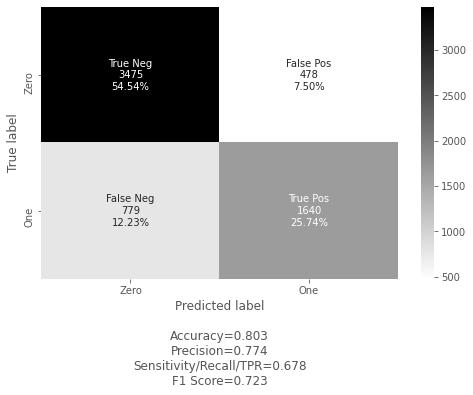

In [74]:
# Evaluating the performance of the model

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
cf_matrix = confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
make_confusion_matrix(cf_matrix, 
                      figsize=[8,5],
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

> with a cutoff of 0.5, though the accuracy is pretty good, we can see that, we are not a a good place in terms of predicting leads who has better chance of conversion.

### 5.2 Choosing optimum cut-off value

In [104]:
# A function to plot ROC Curve

def draw_metrics(actual, probs, df):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    
    num = [float(x)/10 for x in range(11)]
    for i in num:
        df[i] = probs.map(lambda x : 1 if x > i else 0)
        
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    num = [float(x)/10 for x in range(11)]
    for i in num:
        cm = metrics.confusion_matrix(actual, df[i])
        total=sum(sum(cm))
        accuracy = (cm[0,0]+cm[1,1])/total
        specificity = cm[0,0]/(cm[0,0]+cm[0,1])
        sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
        
    precision_val, recall_val , threshold_val = precision_recall_curve(actual, probs)
        
    plt.figure(figsize=[18,6])
    plt.subplot(1,3,1)
    sns.lineplot(fpr, tpr)
    sns.lineplot([0, 1], [0, 1], dashes= True)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.xlim([-.05, 1.05])
    plt.ylim([-.05, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")

    
    plt.subplot(1,3,2)
    ac = sns.lineplot(data = cutoff_df,  x = cutoff_df.prob , y = cutoff_df.accuracy)
    se = sns.lineplot(data = cutoff_df,  x = cutoff_df.prob , y = cutoff_df.sensitivity)
    sp = sns.lineplot(data = cutoff_df,  x = cutoff_df.prob , y = cutoff_df.specificity)
    plt.xlabel('Probability/Cut-off')
    plt.ylabel('Accuracy/Sensitivity/Specificity')
    plt.title('Accuticy, Sensitivity & Specificity Vs Probability')
    plt.legend([ac, se, sp], ['accuracy', 'sensitivity', 'specificity'])

    
    plt.subplot(1,3,3)
    pr = sns.lineplot(x = threshold_val , y = precision_val[:-1])
    re = sns.lineplot(x = threshold_val , y = recall_val[:-1])
    plt.xlabel('Probability/Cut-off')
    plt.ylabel('Precision/Recall')
    plt.title('Precision & Recall Vs Probability')
    plt.legend(precision_val, recall_val)
    plt.legend([pr, re], ['precision', 'recall'])

    
plt.show()

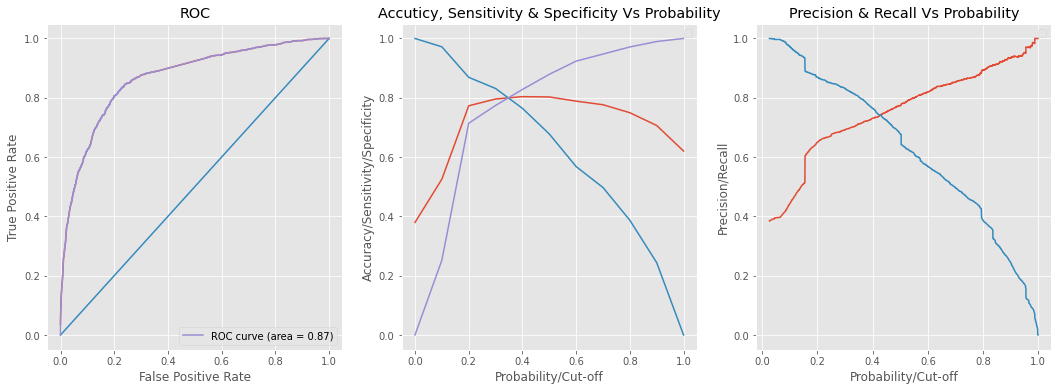

In [105]:
# drawing the ROC curve to find out a sutable threshold valueb

draw_metrics(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob, Y_train_pred_final)

> From the above chart we see that something around 0.2 to 0.3 would be a good threshold.

> From the above chart we can see the accuracy remains almost constant after cut-off=0.2. <br>
> Since we need a high sensitivity we can choose 0.2 as cutoff

### 5.3 Evaluating the model outcome based on new cut-off 0.2 (Train Set)

In [77]:
# setting values to class based on the accuired thereshold
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
7962,0,0.871421,7962,1,1,1,1,1,1,1,1,1,1,0,0
5520,0,0.071900,5520,0,1,0,0,0,0,0,0,0,0,0,0
1962,0,0.088077,1962,0,1,0,0,0,0,0,0,0,0,0,0
1566,1,0.944879,1566,1,1,1,1,1,1,1,1,1,1,1,0
9170,0,0.154490,9170,0,1,1,0,0,0,0,0,0,0,0,0


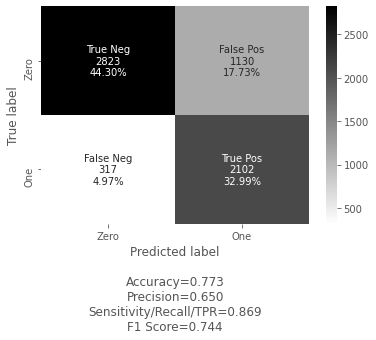

In [78]:
# Building confussion matrix using the threshold of 0.2 (Training data Set)

cf_matrix = confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      figsize=[6,4],
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

> We get a 77.3% of accuracy which is good, but we also have a very high sensitivity which is what is of more relevance here.

### 5.4 Evaluating the model outcome based on new cut-off 0.2 and test set

In [79]:
# Preparing tes data set for prediction

x_test[leads_num_list] = scalar.transform(x_test[leads_num_list])
X_train_wo_const = X_train_sm.drop(['const'],axis=1).columns
x_test=x_test[X_train_wo_const]
x_test = sm.add_constant(x_test)
x_test.head(3)

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Management,Lead Source_Olark Chat,Last Notable Activity_SMS Sent
3504,1.0,0,-0.103815,0,1,0,0,0,0,0
4050,1.0,0,-0.881052,1,1,0,0,0,0,1
7201,1.0,1,0.424120,0,1,0,0,1,0,1


In [80]:
# Making predictions on test data set and saving the predicted values into a variable

y_test_pred = res.predict(x_test)

In [81]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,CustID
3504,0,0.139258,3504
4050,1,0.955220,4050
7201,0,0.350397,7201
1196,0,0.139016,1196
8219,1,0.129965,8219


In [82]:
# setting values to class based on the accuired thereshold

y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
3504,0,0.139258,3504,0
4050,1,0.955220,4050,1
7201,0,0.350397,7201,1
1196,0,0.139016,1196,0
8219,1,0.129965,8219,0


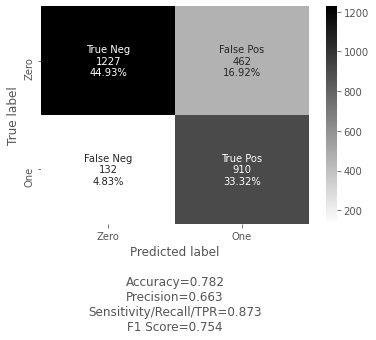

In [83]:
# Building confussion matrix using the threshold of 0.2 (Testing data Set)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
cf_matrix = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
make_confusion_matrix(cf_matrix, 
                      figsize=[6,4],
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

> We get a 78.3% of accuracy which is good, but we also have a very high sensitivity 87.3 for this model on this test data.

## Final Observation: ##

Train Data: <br>
Accuracy : 77.3% <br>
Sensitivity : 86.9% <br>

Test Data: <br>
Accuracy : 78.2% <br>
Sensitivity : 87.3% <br><br>
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## 6. Assigning Scores to leads ##

In [84]:
# Crating a score column in test dataset

y_test_pred_final['Converted_Prob_score'] = round(y_test_pred_final.Converted_Prob*100,2)
y_test_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,Converted_Prob_score
3504,0,0.139258,3504,0,13.93
4050,1,0.955220,4050,1,95.52
7201,0,0.350397,7201,1,35.04
1196,0,0.139016,1196,0,13.90
8219,1,0.129965,8219,0,13.00


In [85]:
# Crating a score column in train dataset

Y_train_pred_final['Converted_Prob_score'] = round(Y_train_pred_final.Converted_Prob*100,2)
Y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,Converted_Prob_score
7962,0,0.871421,7962,1,1,1,1,1,1,1,1,1,1,0,0,87.14
5520,0,0.071900,5520,0,1,0,0,0,0,0,0,0,0,0,0,7.19
1962,0,0.088077,1962,0,1,0,0,0,0,0,0,0,0,0,0,8.81
1566,1,0.944879,1566,1,1,1,1,1,1,1,1,1,1,1,0,94.49
9170,0,0.154490,9170,0,1,1,0,0,0,0,0,0,0,0,0,15.45


In [86]:
# Adding score to the training Data
X_train_with_Score = pd.merge(left = X_train_merge, right = Y_train_pred_final[['Converted_Prob_score','CustID']], on='CustID')

In [87]:
# Adding score to the testing Data
X_test_with_Score = pd.merge(left = X_test_merge, right = y_test_pred_final[['Converted_Prob_score','CustID']], on='CustID')

In [88]:
# creating a combained data set with scores for all the data points
final_data_set = pd.concat([X_train_with_Score, X_test_with_Score], axis=0)

In [89]:
# Addind index to the column as 'CustID'
leads_copy['CustID'] = leads_copy.index

In [90]:
# Creating the final data set
final_data_set = pd.merge(leads_copy,final_data_set[['Converted_Prob_score', 'CustID']], on='CustID')

In [91]:
final_data_set.shape

(9103, 39)

In [92]:
final_data_set.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,CustID,Converted_Prob_score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,15.45
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,21.15
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2,73.44


### final_data_set is the dataset with lead score between 0 and 100. A higher score means that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.